In [1]:
from  function_set import *
import openpyxl

## 試題1
1.請利用python 把美股相關資料填入AU14:BC577<br>
2.把漲跌幅前10大個股的資料視覺化呈現<br>
3.加分題：把資料匯進Access資料庫<br>

In [2]:
# 讀取 ticker
symbols = pd.read_excel('試題.xlsx', sheet_name='試題一', usecols='AU:BC', skiprows=13, nrows=564)

In [3]:
data = pd.DataFrame()
for i in symbols['代碼.2']:
    temp = get_stock(str(i))
    data = pd.concat([data, temp])
    
result = symbols.merge(data, left_on= ['代碼.2'],right_on=['代碼'], how = 'left')
result = result[['代碼.2','收盤價','日漲跌幅(%)','日成交量','日最高價','日最低價']]
result.head(30)

- 代碼: No data found, symbol may be delisted
- ABMD: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- CTXS: No data found, symbol may be delisted
- DRE: No data found, symbol may be delisted
- FBHS: No data found, symbol may be delisted
- NLOK: No data found, symbol may be delisted
- NLSN: No data found, symbol may be delisted
- TWTR: No data found for this date range, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No d

,代碼.2,收盤價,日漲跌幅(%),日成交量,日最高價,日最低價
0,#DJI,33045.089844,-0.255059,3.219100e+08,33245.968750,32948.269531
1,#GSPC,3991.050049,-0.157356,4.079320e+09,4017.370117,3976.899902
2,#IXIC,11507.070312,0.128525,4.671270e+09,11582.519531,11445.169922
3,#SOXX,2892.389893,-0.477250,0.000000e+00,2935.929932,2875.560059
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,代碼,NaN,NaN,NaN,NaN,NaN
9,A,142.080002,-0.934316,1.691300e+06,143.440002,140.949997


Text(0, 0.5, '報酬率')

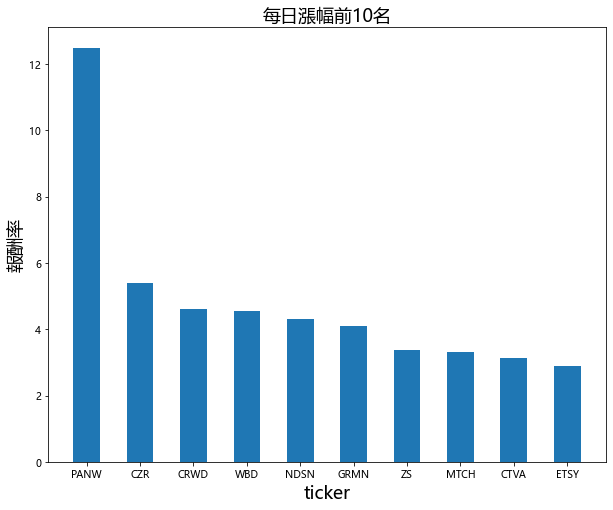

In [4]:
up_10 = data[data['日漲跌幅(%)']>0].sort_values('日漲跌幅(%)', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = up_10['代碼'], height=up_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日漲幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

Text(0, 0.5, '報酬率')

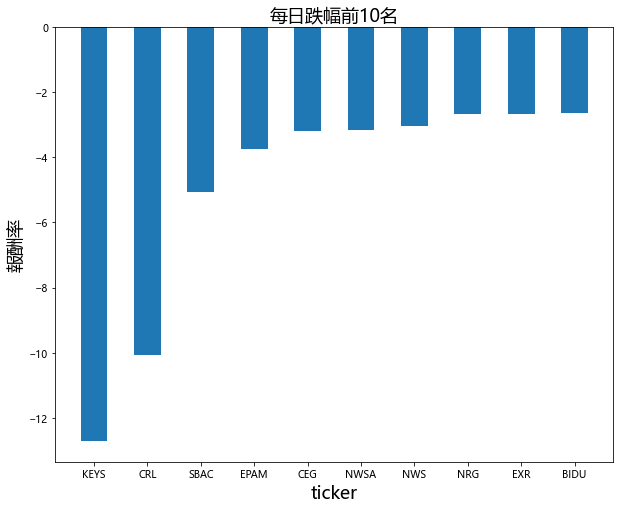

In [5]:
down_10 = data[data['日漲跌幅(%)']<0].sort_values('日漲跌幅(%)', ascending=True).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = down_10['代碼'], height=down_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日跌幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

In [6]:
# 讀取 excel
workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[0]
fill_columns = ['AW', 'AY','AZ','BA','BB']
for col in ['AW', 'AY','AZ','BA','BB']:
    for index in range(15, 15+len(result)):
        sheet[col+str(index)] = result.iloc[index-15, fill_columns.index(col)+1]

## 試題二
1.請用python爬蟲下載新聞，擷取A.標題、B連結(內文不用)，產出列於G13至G300(網站：鉅亨網、工商時報、經濟日報，三選二)<br>
選擇-> 鉅亨網, 工商時報<br>
2.加分題：給予每條新聞重要程度分數

In [7]:
anue_url = 'https://api.cnyes.com/media/api/v1/newslist/category/headline'
eco_url = 'https://money.udn.com/rank/newest/1001/0/1?from=edn_navibar'
ctee_url = 'https://ctee.com.tw/livenews/aj'

In [8]:
data_anue = get_anue_titles_urls(anue_url, '1')
data_anue

TypeError: 'NoneType' object is not callable

In [ ]:
data_ctee = get_ctee_titles_urls(ctee_url)
data_ctee

,news_urls,news_titles
0,https://ctee.com.tw/livenews/aj/ctee/A08609002...,南部水情吃緊? 政府提早因應仍可維持供水 | 02/23 18:07
1,https://ctee.com.tw/livenews/aj/ctee/A02618002...,榮剛去年每股賺4.52元 創高 | 02/23 17:53
2,https://ctee.com.tw/livenews/aj/ctee/A93610002...,保誠集團新任執行總裁Anil Wadhwani上任 | 02/23 17:44
3,https://ctee.com.tw/livenews/aj/ctee/A99634002...,高雄科工館房市夯 歐美建設推森青道攻換屋客 | 02/23 17:39
4,https://ctee.com.tw/livenews/aj/ctee/A93610002...,跨品牌、易操作、彈性高 鉅亨母子基金「鉅寶盆」登場 | 02/23 17:38
...,...,...
45,https://ctee.com.tw/livenews/aj/chinatimes/202...,PChome去年Q4由虧轉盈了！ 詹宏志：營運好轉要長久才支薪 | 02/21 17:27
46,https://ctee.com.tw/livenews/aj/ctee/A07634002...,全台最優！桃園青創貸款補助5年免息 | 02/21 17:26
47,https://ctee.com.tw/livenews/aj/ctee/A95645002...,金管會推綠色金融科技主題活動 反漂綠跨境試驗登場 | 02/21 17:24
48,https://ctee.com.tw/livenews/aj/ctee/A91617002...,一天漲逾66％ 清淨海被列線上監視股票 | 02/21 17:24


In [ ]:
data = pd.concat([data_anue, data_ctee]).reset_index(drop=True)
data

In [ ]:
# 讀取 excel
# workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[1]
col = ['K']
for index in range(300-13):
    link = data.loc[index, 'news_urls']
    text = data.loc[index, 'news_titles']
    sheet.cell(row=index+13,column=7,value=text)
    sheet.cell(row=index+13,column=7).hyperlink=link

## 試題三

In [ ]:
data = pd.DataFrame()
stks = ['2882','2330','1301']
for stk in stks:
    temp = get_self_acc_sales(stk,'111')
    data = pd.concat([data, temp])
data = data.reset_index(drop=True)
data

In [ ]:
# 讀取 excel
# workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[2]
fill_columns = ['A', 'B','C']
for col in fill_columns:
    for index in range(len(data)):
        sheet[col+str(index+4)] = data.iloc[index, fill_columns.index(col)]

In [ ]:
# 儲存檔案
workbook.save('test.xlsx')